# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
def performance_measure(data):
   
    def predict_class(x):
        if x >= 0.5:
            return 1.0
        return 0.0

    data = data.rename(columns={"y": "y_true", "prob":"proba"})
    actualscore = data['proba']
    data = data.assign(y_pred = actualscore.map(predict_class))
    
    N = len(data[data.y_true ==0])
    P = len(data[data.y_true ==1])
    print("Total Actual 0 N =", N)
    print("Total Actual 1 P =", P)
    print('-'*50)

    predicted_1 = len(data[data.y_pred ==1])
    predicted_0 = len(data[data.y_pred ==0])
    print("Total Predicted Negative Points  =", predicted_0)
    print("Total Predicted Positive Points   =", predicted_1)
    print('-'*50)

    TP = ((data['y_true']==1.0) & (data['y_pred'] == 1.0)).sum()
    TN = ((data['y_true']==0.0) & (data['y_pred'] == 0.0)).sum()
    FP = ((data['y_true']==0.0) & (data['y_pred'] == 1.0)).sum()
    FN = ((data['y_true']==1.0) & (data['y_pred'] == 0.0)).sum()
    
    print("FP :", FP)
    print("TN :", TN)
    print("TP :", TP)
    print("FN :", FN)
    print('-'*50)

    #Computing Confusion Matrics
    confusion_matrix = np.array([TN, FN, FP, TP]).reshape(2,2)
    print("Confusion_Matrix :",)
    print(confusion_matrix)
    print('-'*50)
    
    #Computing Precison and Recall
    #To avoid division by zero error
    if (TP+FP) == 0:
        Pr = (print("Precision undefined as TP and FP = 0"))
    else:
        Pr = TP/(TP + FP)
        print("Precision Pr = ", Pr)      
    Re = (TP/P)
    print("Recall Re    = ", Re )

    #Computing F1 Score
    if TP == 0:
        print("F1 Score is undefinied")     
    else:
        F1_Score = 2 * ((Pr * Re)/(Pr + Re))
        print("F1 Score is :", F1_Score)
    print('-'*50)
    
    #Computing TPR, FPR, TNR, FNR
    TPR = (TP/P)
    FPR = (FP/N)
    TNR = (TN/N)
    FNR = (FN/P)
    print("True Positive Rate TPR = ", TPR)
    print("True Positive Rate FPR = ", FPR)
    print("True Positive Rate TNR = ", TNR)
    print("True Positive Rate FNR = ", FNR)
    print('-'*50)
    
    #Accuracy
    Accuracy = (TP+TN)/(P+N)
    print("Accuracy is : ", Accuracy)
    
    #return confusion_matrix, Pr, Re, F1_Score, TPR, FPR, TNR, FNR

In [3]:
def compute_AUC(data):

    def predict_class_for_threshold(x):
        if x >= t:
            return 1.0
        return 0.0
    
    def compute_TPR_FPR(y_true, y_pred):
        N = y_true.count(0)
        P = y_true.count(1)
        predicted_1 = y_pred.count(1)
        predicted_0 = y_pred.count(0)
        TP = ((data['y_true']==1.0) & (data['y_pred'] == 1.0)).sum()
        FP = ((data['y_true']==0.0) & (data['y_pred'] == 1.0)).sum()
        TPR = (TP/P)
        FPR = (FP/N)
        return TPR, FPR
    
    data = data.rename(columns={"y": "y_true", "prob":"proba"})
    actualscore = data['proba']
    
    #Sorting data 
    data = data.sort_values( by= ["proba"], ascending = False)
    threshold = list(data.proba.unique())

    TPR_list = []
    FPR_list = []
    
    
    for t in tqdm(threshold):
        y_pred = actualscore.map(predict_class_for_threshold)
        data['y_pred'] = y_pred

        y_pred =list(data.y_pred)
        y_true =list(data.y_true)
    
        TPR , FPR = compute_TPR_FPR(y_true, y_pred)
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    
    AUC = np.trapz(TPR_list, FPR_list)
    return AUC, TPR_list, FPR_list



In [4]:
data = pd.read_csv('5_a.csv')

In [5]:
performance_measure(data)

Total Actual 0 N = 100
Total Actual 1 P = 10000
--------------------------------------------------
Total Predicted Negative Points  = 0
Total Predicted Positive Points   = 10100
--------------------------------------------------
FP : 100
TN : 0
TP : 10000
FN : 0
--------------------------------------------------
Confusion_Matrix :
[[    0     0]
 [  100 10000]]
--------------------------------------------------
Precision Pr =  0.9900990099009901
Recall Re    =  1.0
F1 Score is : 0.9950248756218906
--------------------------------------------------
True Positive Rate TPR =  1.0
True Positive Rate FPR =  1.0
True Positive Rate TNR =  0.0
True Positive Rate FNR =  0.0
--------------------------------------------------
Accuracy is :  0.9900990099009901


100%|██████████| 10100/10100 [02:27<00:00, 68.58it/s]


AUC is 0.48829900000000004


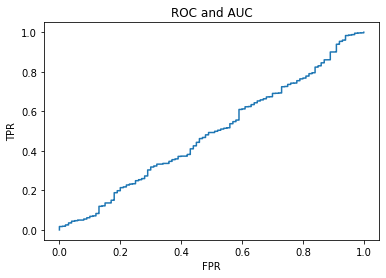

In [6]:
AUC, TPR_list, FPR_list = compute_AUC(data)
print("AUC is", AUC)
plt.plot(FPR_list, TPR_list,)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC and AUC")
plt.show()

____________

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [7]:
data = pd.read_csv('5_b.csv')

  0%|          | 5/10100 [00:00<03:43, 45.17it/s]

Total Actual 0 N = 10000
Total Actual 1 P = 100
--------------------------------------------------
Total Predicted Negative Points  = 9806
Total Predicted Positive Points   = 294
--------------------------------------------------
FP : 239
TN : 9761
TP : 55
FN : 45
--------------------------------------------------
Confusion_Matrix :
[[9761   45]
 [ 239   55]]
--------------------------------------------------
Precision Pr =  0.1870748299319728
Recall Re    =  0.55
F1 Score is : 0.2791878172588833
--------------------------------------------------
True Positive Rate TPR =  0.55
True Positive Rate FPR =  0.0239
True Positive Rate TNR =  0.9761
True Positive Rate FNR =  0.45
--------------------------------------------------
Accuracy is :  0.9718811881188119


100%|██████████| 10100/10100 [03:02<00:00, 55.31it/s]


AUC is 0.9377570000000001


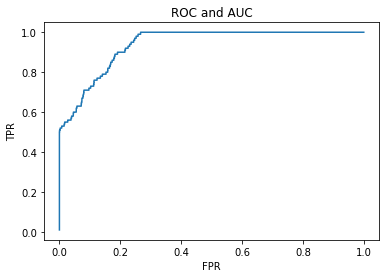

In [8]:
performance_measure(data)
AUC, TPR_list, FPR_list = compute_AUC(data)
print("AUC is", AUC)
plt.plot(FPR_list, TPR_list,)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC and AUC")
plt.show()


**also checking for for 5_C.csv**

  1%|          | 15/2791 [00:00<00:20, 133.09it/s]

Total Actual 0 N = 1805
Total Actual 1 P = 1047
--------------------------------------------------
Total Predicted Negative Points  = 2099
Total Predicted Positive Points   = 753
--------------------------------------------------
FP : 168
TN : 1637
TP : 585
FN : 462
--------------------------------------------------
Confusion_Matrix :
[[1637  462]
 [ 168  585]]
--------------------------------------------------
Precision Pr =  0.7768924302788844
Recall Re    =  0.5587392550143266
F1 Score is : 0.65
--------------------------------------------------
True Positive Rate TPR =  0.5587392550143266
True Positive Rate FPR =  0.09307479224376732
True Positive Rate TNR =  0.9069252077562326
True Positive Rate FNR =  0.44126074498567336
--------------------------------------------------
Accuracy is :  0.7791023842917251


100%|██████████| 2791/2791 [00:23<00:00, 116.81it/s]


AUC is 0.8288141557331724


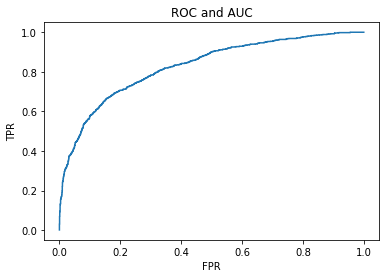

In [9]:
data = pd.read_csv('5_c.csv')
performance_measure(data)
AUC, TPR_list, FPR_list = compute_AUC(data)
print("AUC is", AUC)
plt.plot(FPR_list, TPR_list,)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC and AUC")
plt.show()


__________

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [10]:
def compute_A(data):

    def predict_class_for_threshold(x):
        if x >= t:
            return 1.0
        return 0.0
    
    def compute_TPR_FPR(y_true, y_pred):
        N = y_true.count(0)
        P = y_true.count(1)
        predicted_1 = y_pred.count(1)
        predicted_0 = y_pred.count(0)
        FP = ((data['y_true']==0.0) & (data['y_pred'] == 1.0)).sum()
        FN = ((data['y_true']==1.0) & (data['y_pred'] == 0.0)).sum()
        return FN, FP
    
    data = data.rename(columns={"y": "y_true", "prob":"proba"})
    actualscore = data['proba']
    data = data.sort_values( by= ["proba"], ascending = False)
    threshold = list(data.proba.unique())

    TPR_list = []
    FPR_list = []
    A_list = []
    
    for t in tqdm(threshold):
        y_pred = actualscore.map(predict_class_for_threshold)
        data['y_pred'] = y_pred

        y_pred =list(data.y_pred)
        y_true =list(data.y_true)
    
        FN, FP = compute_TPR_FPR(y_true, y_pred)
        A = 500*FN + 100*FP
        A_list.append(A)
        
    A_dict = dict(zip(A_list, threshold))
    best_threshold = A_dict.get(min(A_list))
    
    return A_dict, best_threshold


In [11]:
data = pd.read_csv('5_c.csv')
A_dict, best_threshold = compute_A(data)

100%|██████████| 2791/2791 [00:23<00:00, 116.80it/s]


In [12]:
best_threshold

0.2300390278970873

_______

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

____

In [13]:
def regression_performance(data):
    data = data.rename(columns={"y": "y_true", "pred": "y_pred"})
    data = data.assign(simple_error = abs(data.y_true - data.y_pred))
    data = data.assign(squared_error_on_mean = np.square(data.y_true - (data.y_pred.sum()/len(data.y_pred))))
    data = data.assign(squared_error_on_pred = np.square(data.y_true - (data.y_pred)))
    
    #Computing Mean Square Error
    MSE = data.squared_error_on_pred.sum()/len(data)
    
    #Computing Mean Absolure Percentage Error
    #Using Modified formula i.e. sum(abs(errors))/Sum(Y_true)
    MAPE = data.simple_error.sum()/data.y_true.sum()
    
    #Computing Coefficient of Determination R_Square
    SS_res = data.squared_error_on_pred.sum()
    SS_tot = data.squared_error_on_mean.sum()
    R_square =1 - (SS_res/SS_tot)
    
    return MSE, MAPE, R_square

In [14]:
data = pd.read_csv('5_d.csv')
MSE, MAPE, R_square = regression_performance(data)
print("MSE : ", MSE)
print("MAPE: ", MAPE)
print("R_Square : ", R_square)                   

MSE :  177.16569974554707
MAPE:  0.1291202994009687
R_Square :  0.9563583447288622


_____

_______